<a href="https://colab.research.google.com/github/amitaucs/tensorflowexplore/blob/master/trafficclassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [0]:
!pip install tensorflow-gpu==2.0.0-beta1

     |████████████████████████████████| 348.9MB 78kB/s 
     |████████████████████████████████| 3.1MB 32.0MB/s 
     |████████████████████████████████| 501kB 54.4MB/s 


In [0]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle

In [0]:
with open("/content/drive/My Drive/Colab Notebooks/traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("/content/drive/My Drive/Colab Notebooks/traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("/content/drive/My Drive/Colab Notebooks/traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [0]:
train

{'coords': array([[  6,   5,  21,  20],
        [  6,   6,  22,  22],
        [  5,   6,  22,  23],
        ...,
        [ 17,  15, 178, 155],
        [ 17,  15, 183, 160],
        [ 20,  18, 211, 184]], dtype=uint8),
 'features': array([[[[ 28,  25,  24],
          [ 27,  24,  23],
          [ 27,  24,  22],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  25],
          [ 31,  27,  26]],
 
         [[ 29,  26,  25],
          [ 27,  25,  23],
          [ 27,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         [[ 28,  26,  26],
          [ 27,  25,  23],
          [ 26,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         ...,
 
         [[ 27,  24,  23],
          [ 28,  25,  24],
          [ 30,  25,  24],
          ...,
          [ 27,  24,  23],
          [ 28,  24,  22],
          [ 29,  25,  22]],
 
         [[ 28,  23,  23],
       

In [0]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [0]:
X_train.shape

(34799, 32, 32, 3)

In [0]:
y_train.shape

(34799,)

# Visualize the data

1

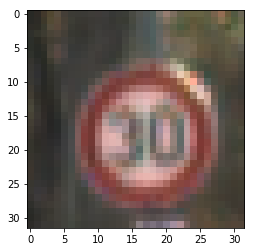

In [0]:
i = 3100
plt.imshow(X_train[i])
y_train[i]

7

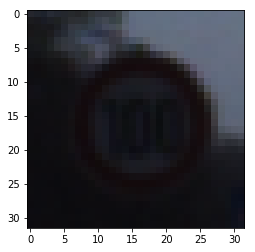

In [0]:
i = 3100
plt.imshow(X_validation[i])
y_validation[i]

29

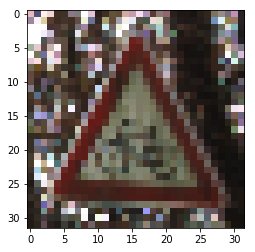

In [0]:
i = 2100
plt.imshow(X_test[i])
y_test[i]

# Data preparation

In [0]:
from sklearn.utils import shuffle
X_train,y_train = shuffle(X_train,y_train)

In [0]:
#Convert from color to grey scaled image
X_train_gray = np.sum(X_train/3, axis = 3, keepdims = True)
X_test_gray = np.sum(X_test/3, axis = 3, keepdims = True)
X_validation_gray = np.sum(X_validation/3, axis = 3, keepdims = True)

In [0]:
X_test_gray.shape

(12630, 32, 32, 1)

In [0]:
X_train_gray.shape

(34799, 32, 32, 1)

In [0]:
X_validation_gray.shape

(4410, 32, 32, 1)

In [0]:
#Normalize the data
X_train_gray_norm = (X_train_gray - 128)/128
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128

In [0]:
X_train_gray_norm

array([[[[-0.2265625 ],
         [-0.22135417],
         [-0.22135417],
         ...,
         [-0.11197917],
         [-0.09114583],
         [-0.06510417]],

        [[-0.19791667],
         [-0.22135417],
         [-0.22135417],
         ...,
         [-0.15625   ],
         [-0.12760417],
         [-0.09114583]],

        [[-0.2265625 ],
         [-0.2421875 ],
         [-0.22916667],
         ...,
         [-0.15364583],
         [-0.12760417],
         [-0.11458333]],

        ...,

        [[-0.16666667],
         [-0.16927083],
         [-0.15885417],
         ...,
         [-0.18489583],
         [-0.1875    ],
         [-0.17447917]],

        [[-0.15625   ],
         [-0.1796875 ],
         [-0.16927083],
         ...,
         [-0.16927083],
         [-0.16927083],
         [-0.15625   ]],

        [[-0.13802083],
         [-0.18229167],
         [-0.1796875 ],
         ...,
         [-0.1796875 ],
         [-0.18229167],
         [-0.1796875 ]]],


       [[[-0.4609375 ],


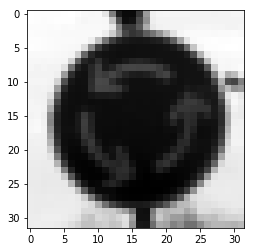

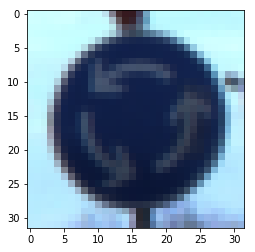

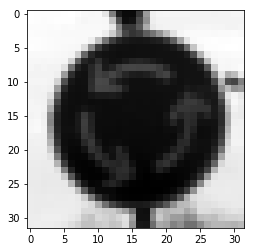

In [0]:
i = 60
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

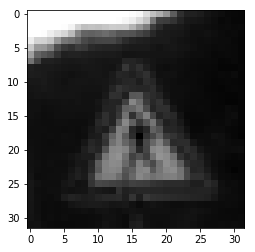

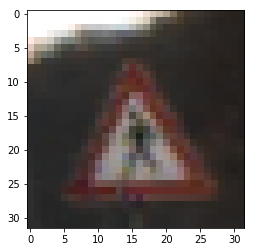

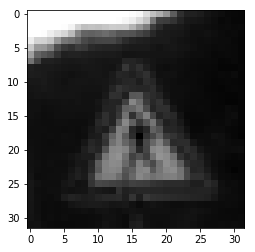

In [0]:
i = 610
plt.imshow(X_test_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_test[i])
plt.figure()
plt.imshow(X_test_gray_norm[i].squeeze(), cmap = 'gray')

# Build the model

In [0]:
from tensorflow.keras import datasets, layers, models

LeNet = models.Sequential()

LeNet.add(layers.Conv2D(6, (5,5), activation = 'relu', input_shape = (32,32,1)))
LeNet.add(layers.AveragePooling2D())


LeNet.add(layers.Conv2D(16, (5,5), activation = 'relu'))
LeNet.add(layers.AveragePooling2D())

LeNet.add(layers.Flatten())

LeNet.add(layers.Dense(120, activation = 'relu'))

LeNet.add(layers.Dense(84, activation = 'relu'))

LeNet.add(layers.Dense(43, activation = 'softmax'))
LeNet.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [0]:
LeNet.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [0]:
history = LeNet.fit(X_train_gray_norm,
                    y_train,
                    batch_size=50,
                    nb_epoch=10,
                    verbose=1,
                    validation_data=(X_validation_gray_norm,y_validation))

Train on 34799 samples, validate on 4410 samples
Epoch 1/10
34799/34799 [==============================] - 21s 606us/sample - loss: 0.7160 - accuracy: 0.7896 - val_loss: 0.7246 - val_accuracy: 0.7934
Epoch 2/10
34799/34799 [==============================] - 20s 588us/sample - loss: 0.3385 - accuracy: 0.9031 - val_loss: 0.5648 - val_accuracy: 0.8370
Epoch 3/10
34799/34799 [==============================] - 20s 582us/sample - loss: 0.2178 - accuracy: 0.9393 - val_loss: 0.5975 - val_accuracy: 0.8363
Epoch 4/10
34799/34799 [==============================] - 20s 586us/sample - loss: 0.1582 - accuracy: 0.9569 - val_loss: 0.6776 - val_accuracy: 0.8401
Epoch 5/10
34799/34799 [==============================] - 21s 602us/sample - loss: 0.1234 - accuracy: 0.9664 - val_loss: 0.4943 - val_accuracy: 0.8766
Epoch 6/10
34799/34799 [==============================] - 21s 598us/sample - loss: 0.0940 - accuracy: 0.9739 - val_loss: 0.5239 - val_accuracy: 0.8705
Epoch 7/10
34799/34799 [=====================

# Model evaluation

In [0]:
score = LeNet.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

12630/12630 [==============================] - 4s 293us/sample - loss: 0.7013 - accuracy: 0.8869
Test Accuracy: 0.8868566751480103


In [0]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [0]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

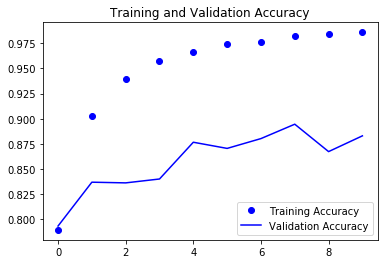

In [0]:
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

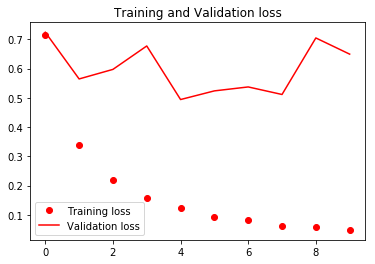

In [0]:
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

In [0]:
predicted_classes = LeNet.predict_classes(X_test_gray_norm)
y_true = y_test

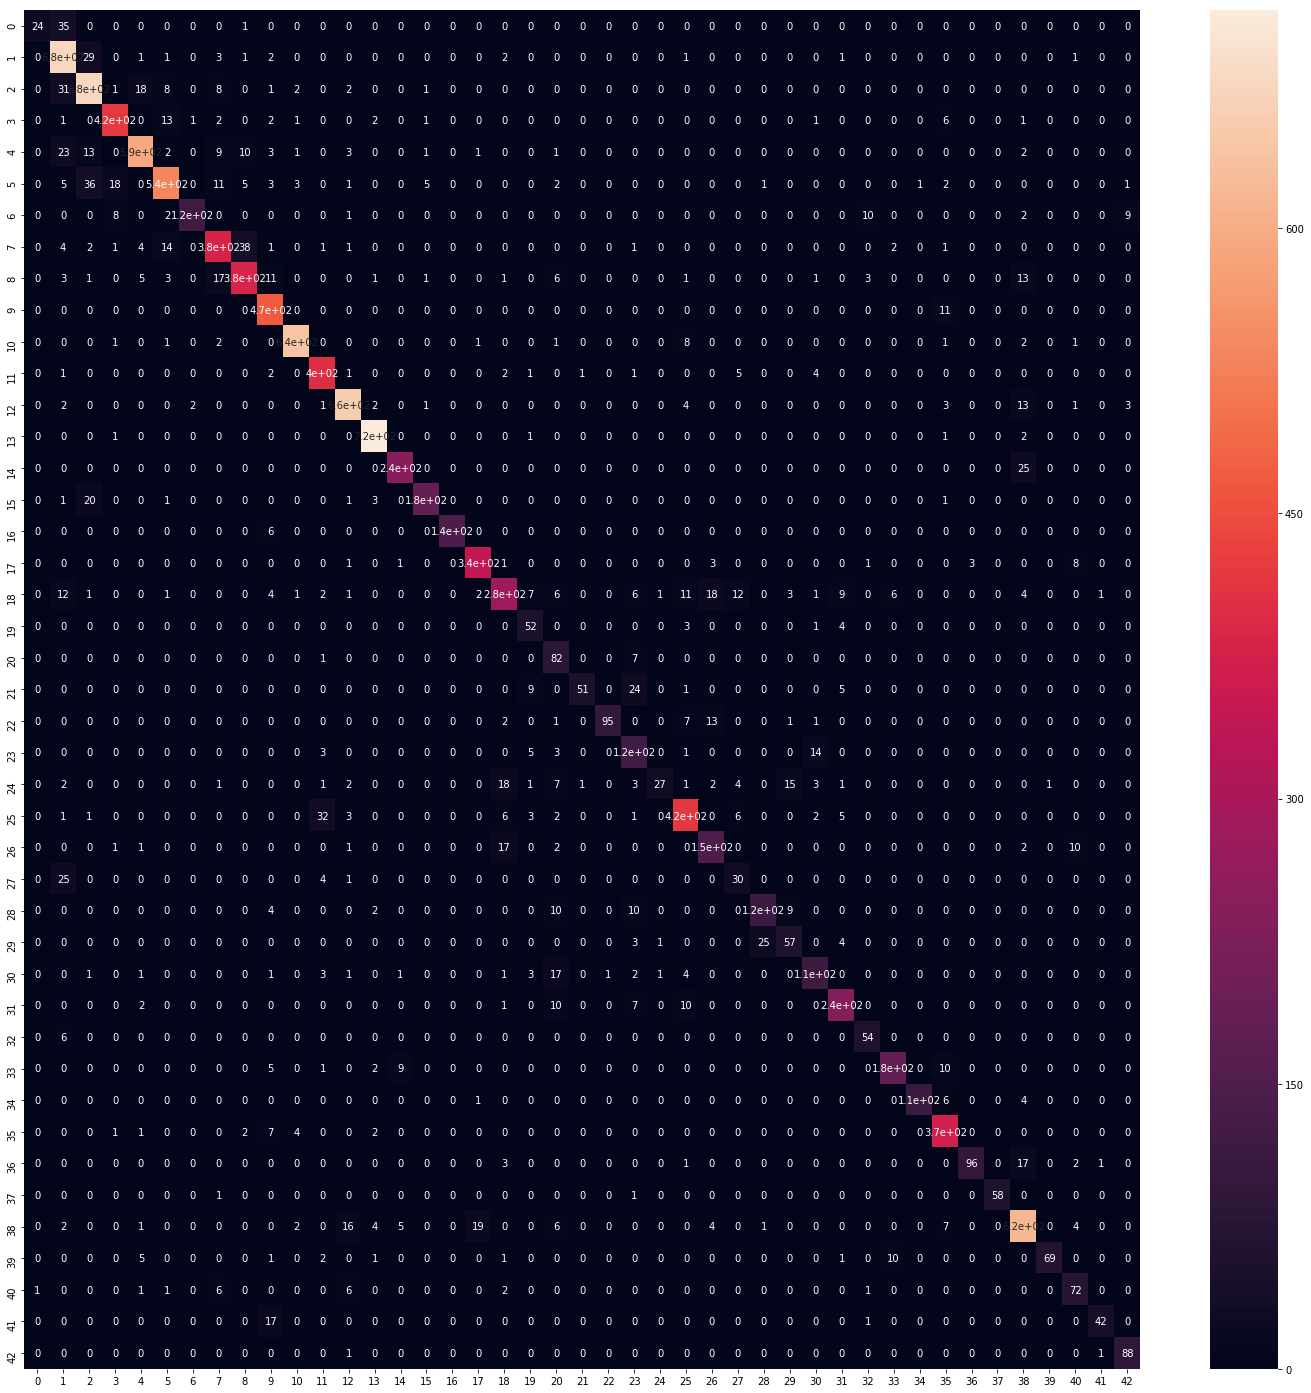

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

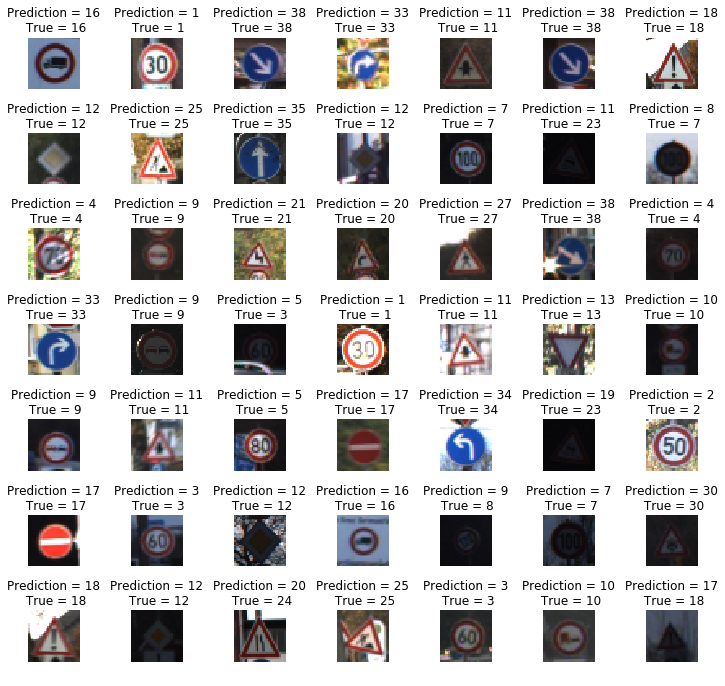

In [0]:
L = 7
W = 7

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1) 

In [0]:
#Read image augmentation